# Image Generators

These are specific APIs which help us to feed generated data to the model. In real world scenarios, the data we gather are usually not labeled or available in csv format. The data are usually small and variation needs to be added manually. This part of the data accumulation for proper feeding to the model can be done properly using the Generator API's.

## Flow from Directory

This API helps us to accumulate the images present in specifc directories and feed it to the model.

Let say we have images in directories with the following structure:
```
data_dir
|---training_dir
    |---class1
        |---img1.jpg
        |---img2.jpg
        :    :
        |---imgn.jpg
    |---class2
        |---img1.jpg
        :    :
    :
    |---classn
        |---img1.jpg
        :
        |---imgn.jpg
|---testing_dir
:
```

In this case, we can use the `flow_from_directory` generator and give the classified labeled data as input where the images inside class1 directory will be labeled class1 and the same for images in testing directory will be labeled. The images in training directory will be used for training whereas the images in testing directory will be used for testing.

### Defining a Generator

We first initialize a `data_generator` object where we state all the preprocessing that we need to be performed on the images that will be loaded i.e. rescaling, flipping etc. and then we use this instance to define the `generator` object where we provide the directory name, batch size, target size etc. 

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_generator = ImageDataGenerator(rescale=1/255.0)  # does the basic rescaling of images as well
train_generator = train_data_generator.flow_from_directory(
    'dataset/horses_humans/training',
    target_size=(256,256),
    batch_size=(128),
    class_mode='binary'
)

Found 986 images belonging to 2 classes.


In [3]:
evaluation_data_generator = ImageDataGenerator(rescale=1/255.0)
evaluation_generator = evaluation_data_generator.flow_from_directory(
    'dataset/horses_humans/evaluation',
    target_size=(256, 256),
    batch_size = (128),
    class_mode='binary'
)

Found 41 images belonging to 2 classes.


### Using the generator

As we are now using a generator for providing the input in place of dataframes or numpy ndarray, we will have to be careful to define the **steps_per_epoch** parameter. 

When you will experiment with the generator, you will find that the generator will keep fetching data, and will never run out of data, i.e. if we use a loop to fetch a batch of data from the generator, we will end up with a non-ending loop which will re-fetch the 1st batch once it runs out of data. In this scenario, it is good that we define the the number of steps we need to itterate over in each epoch so that the whole dataset is covered. This is where we use the `steps_per_epoch` variable. 

We define the `steps_per_epoch` variable to the number of batches required to itterate over all the elements in the dataset i.e. $$steps\_per\_epoch = \frac{number\ of\ elements\ in\ dataset}{batch\_size}$$

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2, # can be any non -ve number depending on what you want the ouput to contain
)

## Example

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
data_generator = ImageDataGenerator(rescale=1/255.0)  # does the basic rescaling of images as well
train_generator = data_generator.flow_from_directory(
    'dataset/horses_humans/training',
    target_size=(256,256),
    batch_size=(128),
    class_mode='binary'
)
evaluation_generator = data_generator.flow_from_directory(
    'dataset/horses_humans/evaluation',
    target_size=(256, 256),
    batch_size=(128),
    class_mode='binary'
)

Found 986 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [7]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape=(256, 256, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [9]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [10]:
model.fit(
    train_generator,
    steps_per_epoch=10,
    validation_data=evaluation_generator,
    validation_steps=10,
    epochs=15,
    verbose=1
)

Epoch 1/15
10/10 [==============================] - 43s 4s/step - loss: 0.7176 - accuracy: 0.5467 - val_loss: 0.6635 - val_accuracy: 0.7561
Epoch 2/15
10/10 [==============================] - 37s 4s/step - loss: 0.6195 - accuracy: 0.7568 - val_loss: 2.7002 - val_accuracy: 0.2439
Epoch 3/15
10/10 [==============================] - 43s 4s/step - loss: 0.3602 - accuracy: 0.8696 - val_loss: 0.7361 - val_accuracy: 0.6098
Epoch 4/15
10/10 [==============================] - 41s 4s/step - loss: 0.1843 - accuracy: 0.9294 - val_loss: 0.7174 - val_accuracy: 0.7561
Epoch 5/15
10/10 [==============================] - 43s 4s/step - loss: 0.1720 - accuracy: 0.9348 - val_loss: 0.1034 - val_accuracy: 0.9512
Epoch 6/15
10/10 [==============================] - 44s 4s/step - loss: 0.1106 - accuracy: 0.9565 - val_loss: 0.5246 - val_accuracy: 0.7805
Epoch 7/15
10/10 [==============================] - 41s 4s/step - loss: 0.0606 - accuracy: 0.9775 - val_loss: 0.2433 - val_accuracy: 0.8780
Epoch 8/15
10/10 [==

In [11]:
layer_outputs = [layer.output for layer in model.layers[:-3]]

In [12]:
visalization_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [14]:
img_path = 'dataset/horses_humans/evaluation/horses/horse50-5.png'
pil_img = load_img(img_path, target_size=(256, 256))
img_array = img_to_array(pil_img)
img_array /= 255
img_array = img_array.reshape((1, 256, 256, 3))

In [15]:
import matplotlib.pyplot as plt

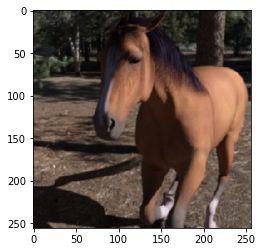

In [16]:
plt.imshow(img_array[0])
plt.show()

In [17]:
feature_maps = visalization_model.predict(img_array)

In [18]:
for feature_map in feature_maps:
    print(feature_map.shape)

(1, 254, 254, 16)
(1, 127, 127, 16)
(1, 125, 125, 32)
(1, 62, 62, 32)
(1, 60, 60, 64)
(1, 30, 30, 64)
(1, 28, 28, 64)
(1, 14, 14, 64)
(1, 12, 12, 64)
(1, 6, 6, 64)


As we can see here different layers have a different number of filters, we can stack them together in a column of 8 as all the numbers are multiples of 8

In [19]:
model.layers[4].name

'conv2d_2'

In [20]:
import math

conv2d


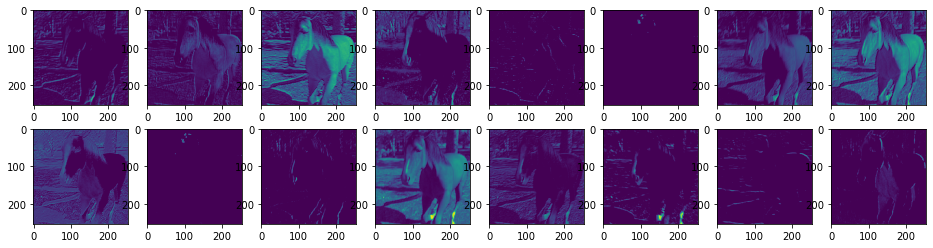

max_pooling2d


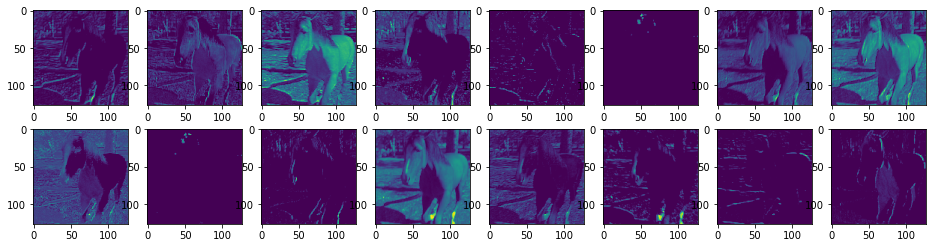

conv2d_1


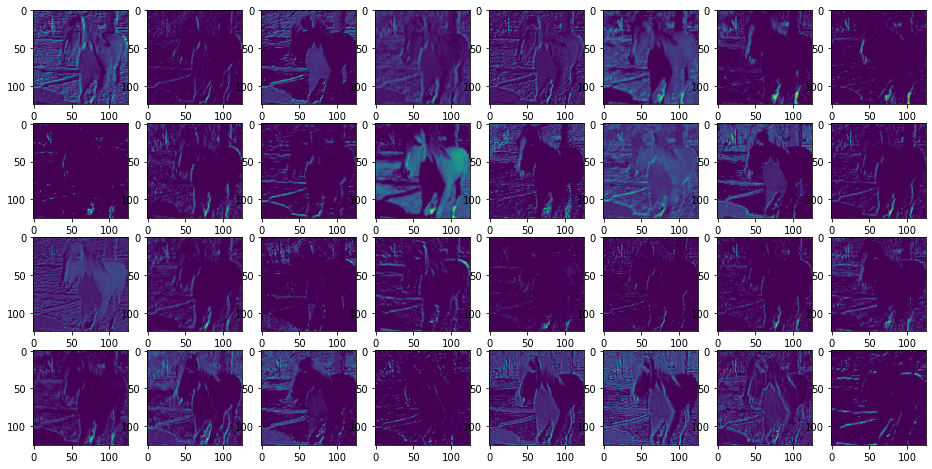

max_pooling2d_1


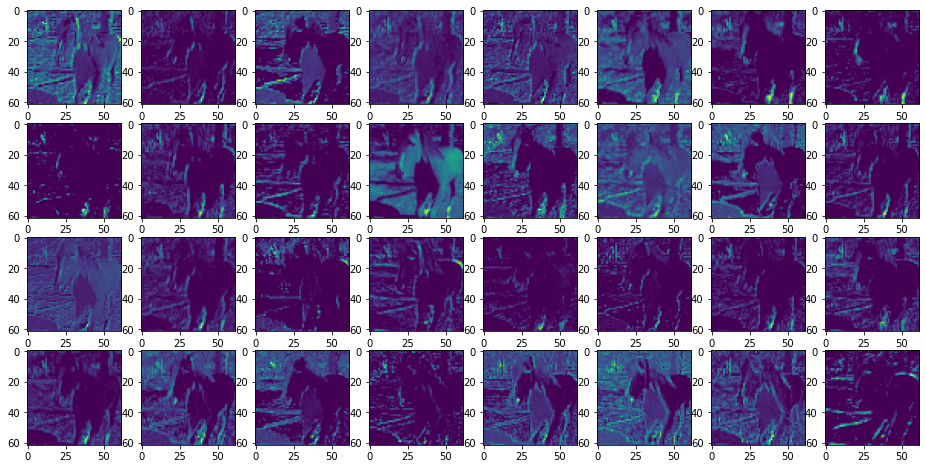

conv2d_2


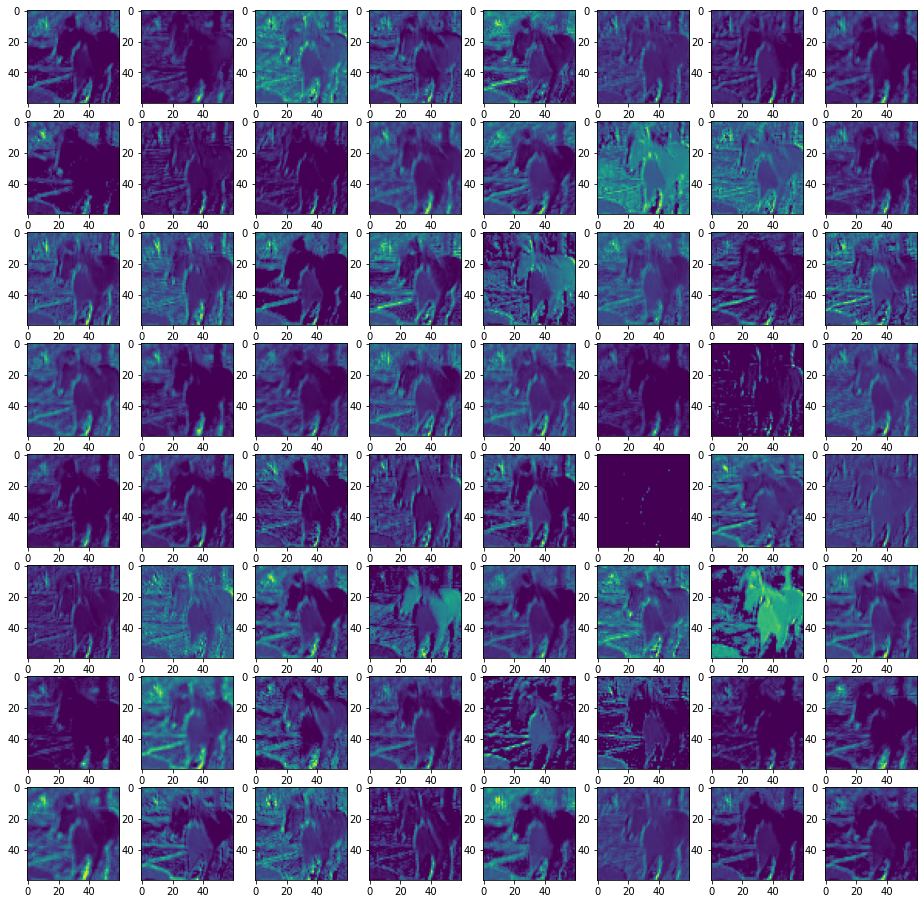

max_pooling2d_2


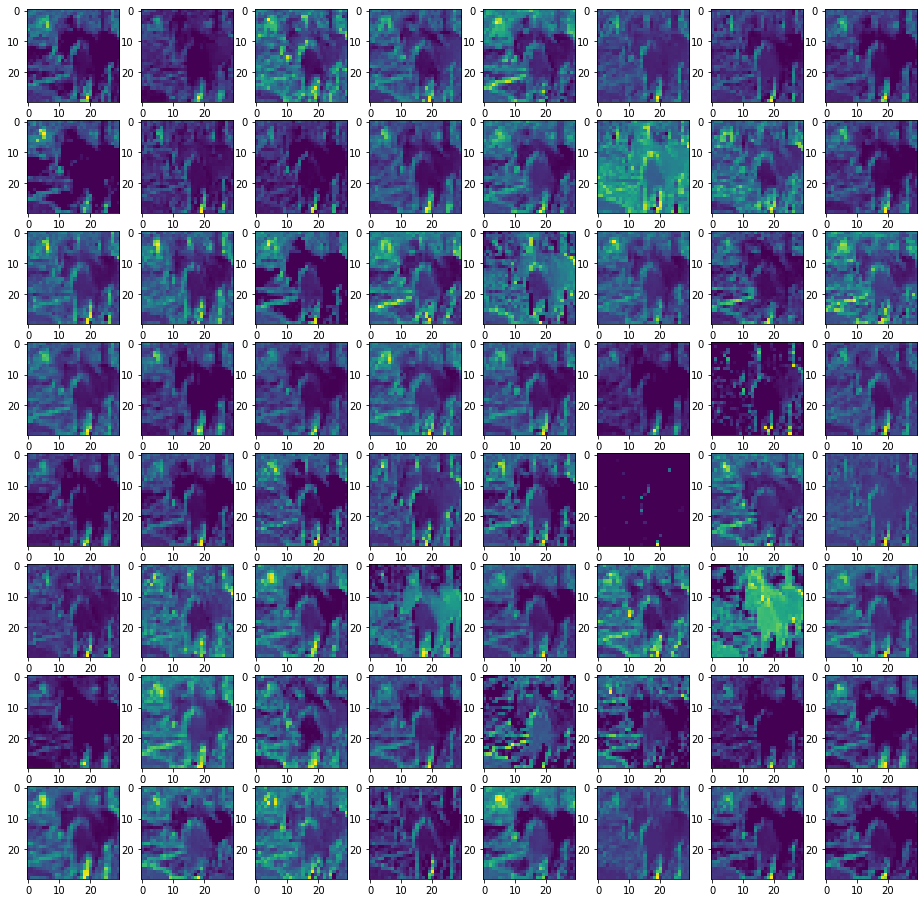

conv2d_3


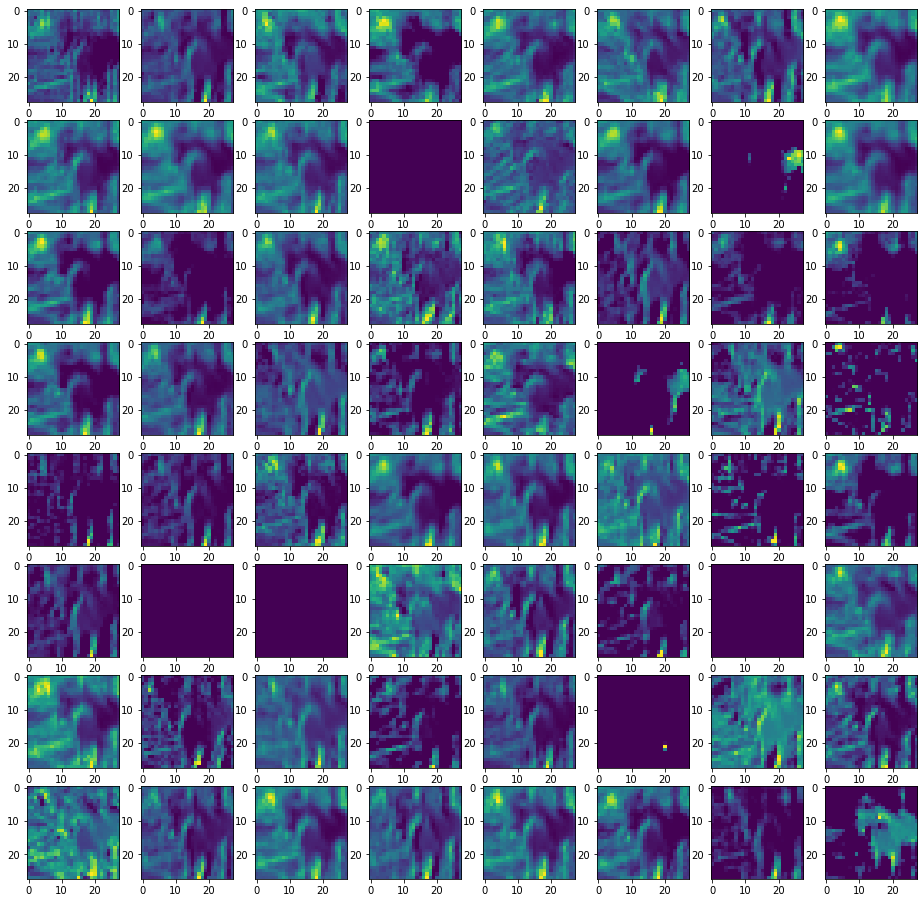

max_pooling2d_3


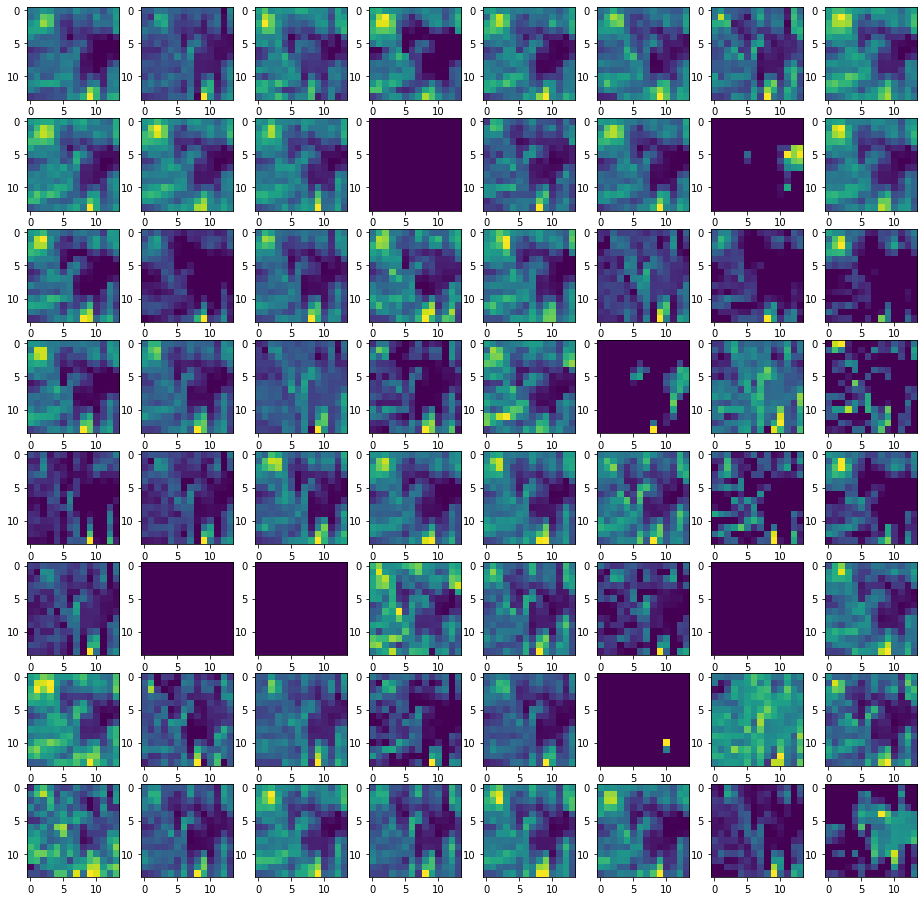

conv2d_4


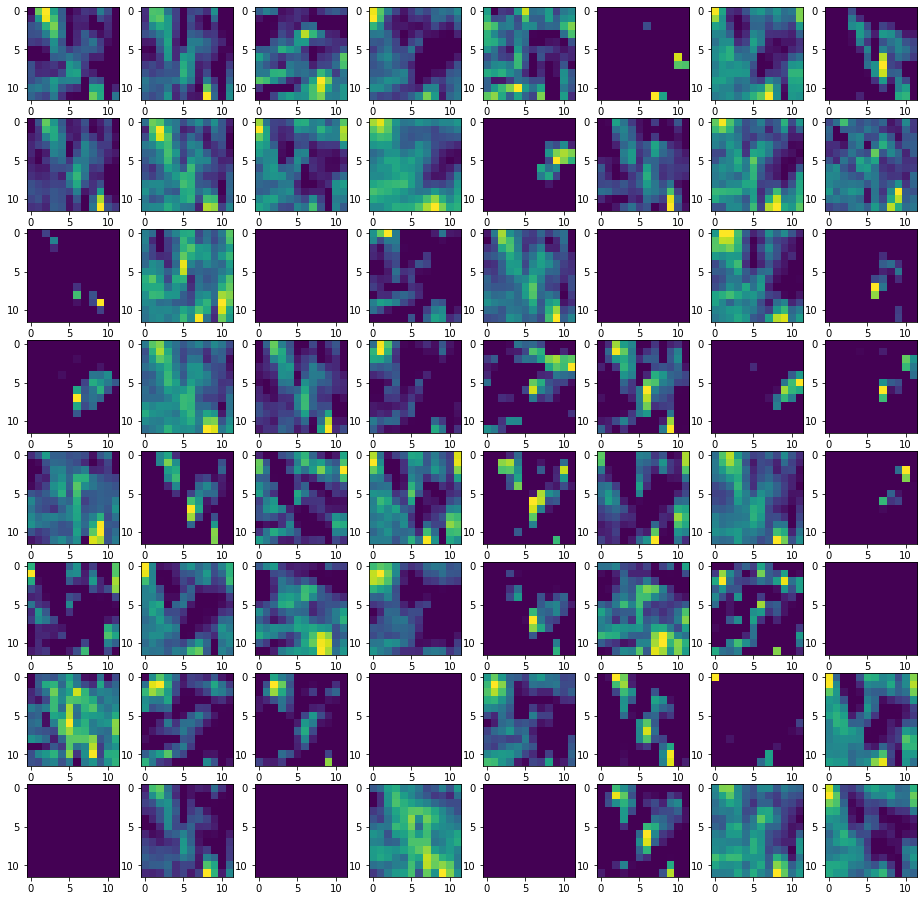

max_pooling2d_4


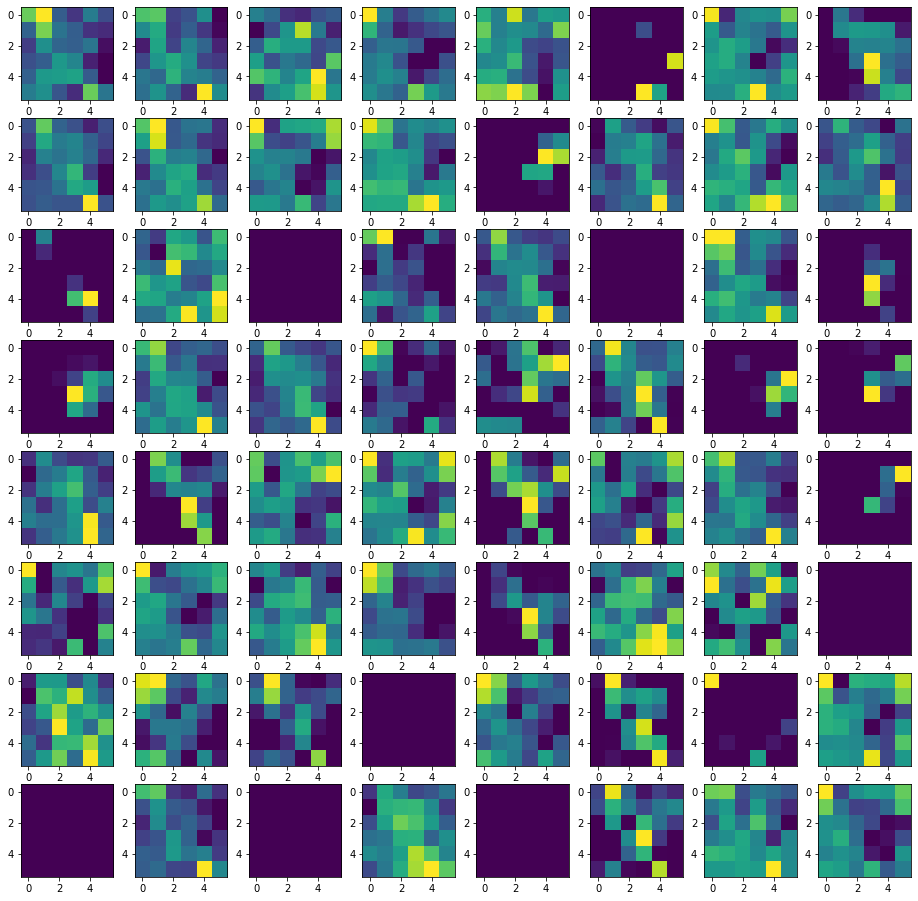

In [21]:
for index, feature_map in enumerate(feature_maps):
    features = feature_map[0]
    num_feat = feature_map.shape[-1]
    num_cols = 8
    num_rows = math.ceil(num_feat / num_cols)
    plt.figure(figsize=(2*num_cols, 2*num_rows))
    print(model.layers[index].name)
    for i in range(num_rows):
        for j in range(num_cols):
            feat_index = i*8+j
            plt.subplot(num_rows, num_cols, feat_index+1).imshow(features[:,:,feat_index], cmap='viridis')
    plt.show()